In [1]:
# loading the required library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset

athletes = pd.read_csv(r'D:\Study Notes\Projects\Python\Olympic\athlete_events.csv')
region = pd.read_csv(r'D:\Study Notes\Projects\Python\Olympic\noc_regions.csv')

In [3]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
region.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
# Merge the 2 dataframes(join the datesets)

athlete_df = athletes.merge(region, how='left', on='NOC')
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
athlete_df.shape

(271116, 17)

In [7]:
athlete_df.shape

(271116, 17)

In [8]:
# droping the notes column

athlete_df.drop('notes', axis=1, inplace=True)

In [9]:
athlete_df.shape

(271116, 16)

In [10]:
# checking null values
athlete_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

In [11]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


In [12]:
# Column names consitent or changing

athlete_df.rename(columns={'region':'Region'}, inplace=True)

In [13]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [14]:
# .describe() gives info about numrical columns 

athlete_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [15]:
# Print the columns names containing null values in the form of a list

athlete_list = athlete_df.columns[athlete_df.isnull().any()]
athlete_list

Index(['Age', 'Height', 'Weight', 'Medal', 'Region'], dtype='object')

In [16]:
# India details
# athlete_df.query('Region = "India"')  (Another way of filtering the data)

india = athlete_df[athlete_df['Region']=='India']

In [17]:
india.count()

ID        1408
Name      1408
Sex       1408
Age       1258
Height     891
Weight     869
Team      1408
NOC       1408
Games     1408
Year      1408
Season    1408
City      1408
Sport     1408
Event     1408
Medal      197
Region    1408
dtype: int64

In [18]:
# top countries to participate in game

athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10)

Region
USA          18853
Germany      15883
France       12758
UK           12256
Russia       11692
Italy        10715
Canada        9734
Japan         8444
Sweden        8339
Australia     7724
Name: ID, dtype: int64

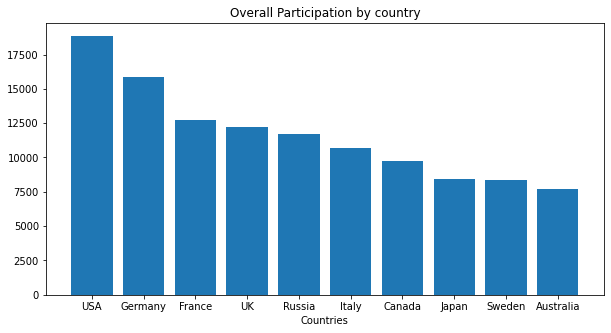

In [19]:
# plot bar graph

plt.figure(figsize=(10,5));
plt.bar(list(athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10).keys()),athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10));
plt.title('Overall Participation by country');
plt.xlabel('Countries');

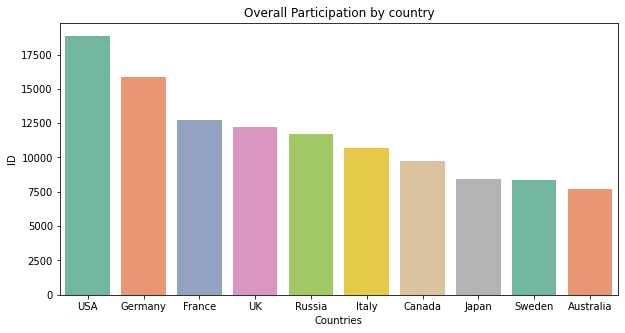

In [20]:
# plot bar using seaborn

plt.figure(figsize=(10,5));
sns.barplot(x=athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10).keys(), y=athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10), palette='Set2');
plt.title('Overall Participation by country');
plt.xlabel('Countries');

In [21]:
athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10)

Region
USA          18853
Germany      15883
France       12758
UK           12256
Russia       11692
Italy        10715
Canada        9734
Japan         8444
Sweden        8339
Australia     7724
Name: ID, dtype: int64

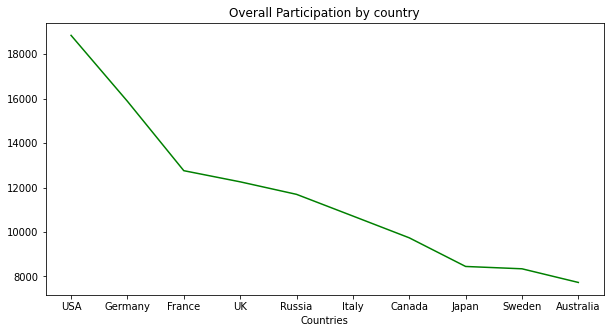

In [22]:
# plot line graph

plt.figure(figsize=(10,5));
plt.plot(list(athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10).keys()),athlete_df.groupby(by='Region')['ID'].count().sort_values(ascending=False).head(10), color='g');
plt.title('Overall Participation by country');
plt.xlabel('Countries');

In [23]:
athlete_df[['Name','Age']].head()

,Name,Age
0,A Dijiang,24.0
1,A Lamusi,23.0
2,Gunnar Nielsen Aaby,24.0
3,Edgar Lindenau Aabye,34.0
4,Christine Jacoba Aaftink,21.0


In [24]:
athlete_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


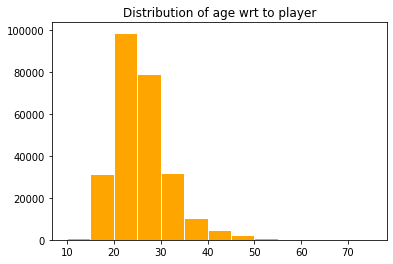

In [25]:
# histogram for age distribution

plt.title('Distribution of age wrt to player');
plt.hist(athlete_df.Age, bins=np.arange(10,80,5), color='orange', edgecolor='white');

In [26]:
winter_sports = athlete_df[athlete_df.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [27]:
summer_sports = athlete_df[athlete_df.Season=='Summer'].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [28]:
# grouping games w.r.t sports

athlete_df.groupby(by='Sport')['ID'].count().sort_values(ascending=False).head(10)

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10859
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: ID, dtype: int64

In [29]:
athlete_df.groupby(by='Sport')['ID'].count().sort_values(ascending=False).tail(10)

Sport
Alpinism               25
Military Ski Patrol    24
Cricket                24
Croquet                19
Motorboating           17
Racquets               12
Jeu De Paume           11
Roque                   4
Basque Pelota           2
Aeronautics             1
Name: ID, dtype: int64

In [30]:
# filtering sport w.r.t athletics

athlete_df[athlete_df['Sport']=='Athletics'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands
27,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Netherlands
57,18,Timo Antero Aaltonen,M,31.0,189.0,130.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Shot Put,NaN,Finland
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN,Estonia
95,32,Olav Augunson Aarnes,M,23.0,NaN,NaN,Norway,NOR,1912 Summer,1912,Summer,Stockholm,Athletics,Athletics Men's High Jump,NaN,Norway


In [31]:
# counting events w.r.t athletics

athlete_df.groupby(by='Event')['ID'].count().sort_values(ascending=False).head(25)

Event
Football Men's Football                   5733
Ice Hockey Men's Ice Hockey               4762
Hockey Men's Hockey                       3958
Water Polo Men's Water Polo               3358
Basketball Men's Basketball               3280
Cycling Men's Road Race, Individual       2947
Gymnastics Men's Individual All-Around    2500
Rowing Men's Coxed Eights                 2423
Gymnastics Men's Team All-Around          2411
Handball Men's Handball                   2264
Athletics Men's Marathon                  2093
Gymnastics Men's Parallel Bars            2049
Gymnastics Men's Horizontal Bar           2041
Gymnastics Men's Pommelled Horse          2031
Gymnastics Men's Rings                    2020
Athletics Men's 100 metres                1936
Athletics Men's 4 x 100 metres Relay      1910
Gymnastics Men's Floor Exercise           1880
Gymnastics Men's Horse Vault              1868
Volleyball Men's Volleyball               1861
Athletics Men's 4 x 400 metres Relay      1749
Bobslei

In [32]:
# counting events w.r.t athletics each year

athlete_df[athlete_df['Sport']=='Athletics']['Event'].nunique()

83

In [33]:
athlete_df.groupby(by='Team')['ID'].count().sort_values(ascending=False).head(10)

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: ID, dtype: int64

In [34]:
athlete_df[athlete_df['Sport']=='Athletics'].groupby(by='Year').count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal,Region
Year,,,,,,,,,,,,,,,
1896,106,106,106,69,32,29,106,106,106,106,106,106,106,37,106
1900,234,234,234,214,57,57,234,234,234,234,234,234,234,76,234
1904,201,201,201,178,88,84,201,201,201,201,201,201,201,79,201
1906,470,470,470,313,153,146,470,470,470,470,470,470,470,65,470
1908,778,778,778,709,317,288,778,778,778,778,778,778,778,101,778
1912,962,962,962,949,527,498,962,962,962,962,962,962,962,143,962
1920,849,849,849,735,335,309,849,849,849,849,849,849,849,133,849
1924,1003,1003,1003,870,404,368,1003,1003,1003,1003,1003,1003,1003,129,1003
1928,992,992,992,885,491,446,992,992,992,992,992,992,992,108,992


In [35]:
athlete_df[athlete_df['Sport']=='Athletics'].groupby(by='Year')['ID'].count()

Year
1896     106
1900     234
1904     201
1906     470
1908     778
1912     962
1920     849
1924    1003
1928     992
1932     522
1936    1007
1948    1051
1952    1344
1956    1013
1960    1312
1964    1335
1968    1345
1972    1686
1976    1297
1980    1268
1984    1674
1988    2062
1992    2054
1996    2386
2000    2468
2004    2175
2008    2244
2012    2278
2016    2508
Name: ID, dtype: int64

In [36]:
# Male and Female participants

athlete_df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

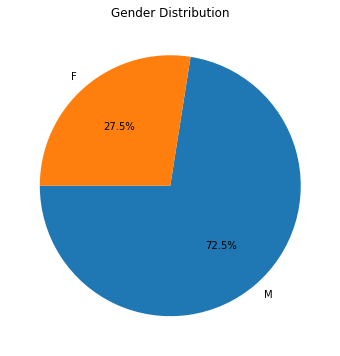

In [37]:
# plot piechart of the sex distribution

plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(list(athlete_df['Sex'].value_counts()), labels=athlete_df['Sex'].value_counts().keys(), autopct='%0.1f%%', startangle=180);

In [38]:
# total medals

athlete_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [39]:
# Total number of female athletes in each olympics

female_athlete = athlete_df[(athlete_df.Sex =='F') & (athlete_df.Season == 'Summer')][['Sex','Year']]
female_athlete = female_athlete.groupby('Year').count().reset_index()
female_athlete.head(10)

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87
5,1920,134
6,1924,244
7,1928,404
8,1932,347
9,1936,468


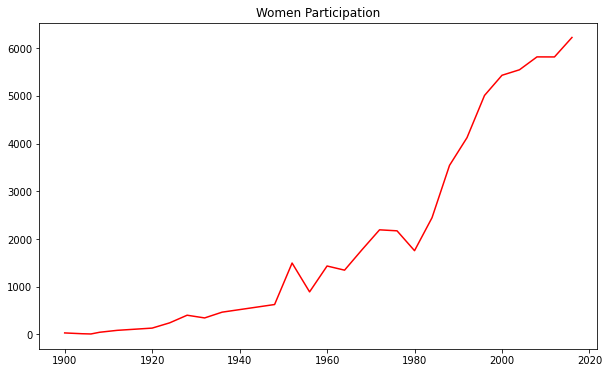

In [40]:
# plot line graph 

olympic_Year = list(athlete_df[(athlete_df.Sex == 'F') & (athlete_df.Season =='Summer')].groupby(by='Year')['Sex'].count().keys())
Women_Player = list(athlete_df[(athlete_df.Sex == 'F') & (athlete_df.Season =='Summer')].groupby(by='Year')['Sex'].count())

plt.figure(figsize=(10,6))
plt.title('Women Participation')
#plt.plot(list(athlete_df[(athlete_df.Sex == 'F') & (athlete_df.Season =='Summer')].groupby(by='Year')['Sex'].count().keys()), list(athlete_df[(athlete_df.Sex == 'F') & (athlete_df.Season =='Summer')].groupby(by='Year')['Sex'].count()))
plt.plot(olympic_Year,Women_Player, color='r')


C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

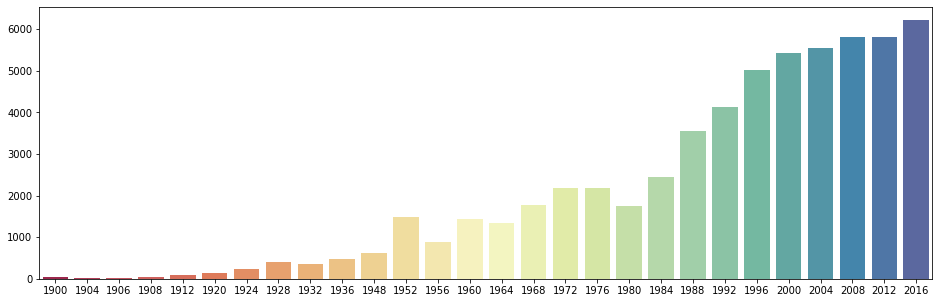

In [41]:
plt.figure(figsize=(16,5))
sns.barplot(olympic_Year,Women_Player, palette='Spectral')

In [42]:
# gold medals athletes 

goldmedal = athlete_df[(athlete_df.Medal == 'Gold')]

In [43]:
# gold medal won w.r.t age

goldmedal = goldmedal[np.isfinite(goldmedal['Age'])]

In [44]:
 goldmedal['ID'][goldmedal['Age'] > 60].count()

6

In [45]:
sporting_event=goldmedal['Sport'][goldmedal['Age'] > 60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

C:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


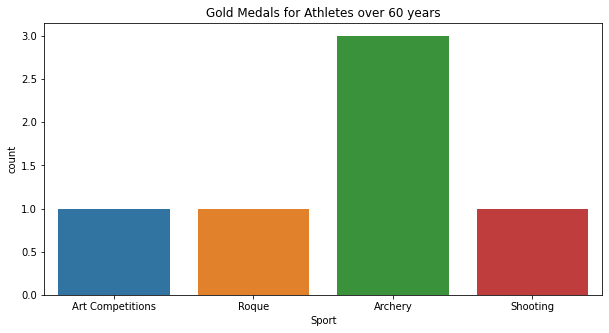

In [46]:
# plot bargraph

plt.figure(figsize=(10,5));
plt.tight_layout();
sns.countplot(sporting_event);
plt.title('Gold Medals for Athletes over 60 years');

In [47]:
totalgoldmedal = goldmedal.Region.value_counts()
totalgoldmedal.head()

USA        2627
Russia     1599
Germany    1293
UK          657
Italy       567
Name: Region, dtype: int64

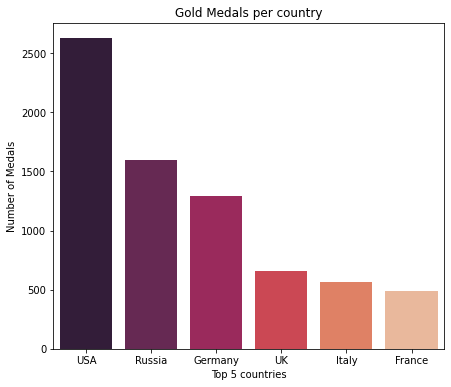

In [48]:
plt.figure(figsize=(7,6))
sns.barplot(x = totalgoldmedal.head(6).keys(), y = totalgoldmedal.head(6), palette='rocket');
plt.xlabel('Top 5 countries');
plt.ylabel('Number of Medals');
plt.title('Gold Medals per country'); 

In [49]:
# Rio olympics

max_year = athlete_df.Year.max()
max_year

team_names = athlete_df[(athlete_df.Year == max_year) & (athlete_df.Medal == 'Gold')].Team

team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

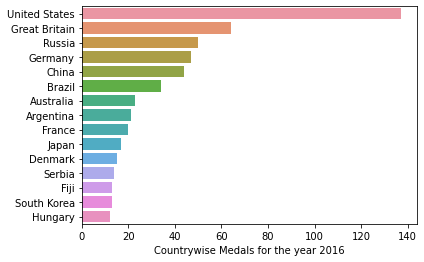

In [50]:
# country wise gold medals

sns.barplot(x=team_names.value_counts().head(15), y=team_names.value_counts().head(15).keys());
plt.ylabel(None);
plt.xlabel('Countrywise Medals for the year 2016');

In [51]:
not_null_medals = athlete_df[(athlete_df['Height'].notnull()) & (athlete_df['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs Weight of olympic Medalists')

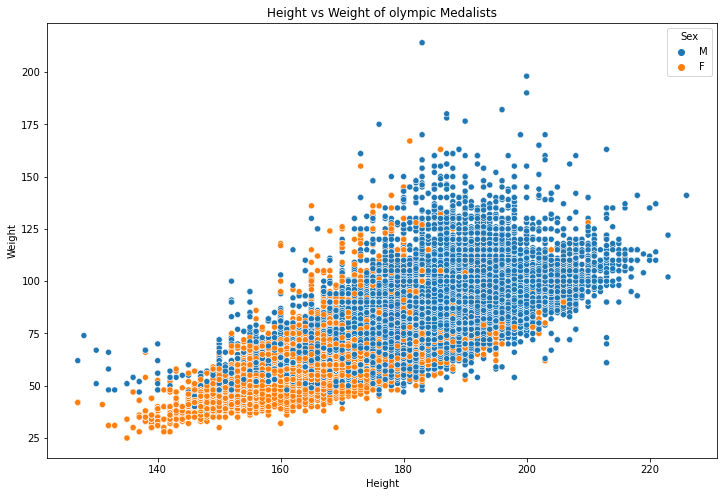

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Height', y='Weight', data=not_null_medals, hue='Sex')
plt.title('Height vs Weight of olympic Medalists')